In [1]:
import math
import collections
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import utils

In [2]:
# define annuity
# define real estate market development
# define stock market development
# define currency exchange rate development

In [3]:
MonthlyStatus = collections.namedtuple('MonthlyStatus',
                                       ['mortgage_amount', 'price_index', 'current_price'])


def get_price_index(year_growth_rate, month):
    return math.pow(1 + year_growth_rate/12, month)


class Simulation:
    def __init__(self, growth_rate, purchase_price, mortgage):
        self.growth_rate = growth_rate
        self.purchase_price = purchase_price
        self.mortgage = mortgage
        self.mortgage_history = []
        self.payment_history = []
    
    def get_monthly_status(self, month):
        mortgage_amount = self.mortgage.mortgage_amount
        price_index = get_price_index(self.growth_rate, month)
        current_price = (self.purchase_price + (self.purchase_price * (price_index - 1)))
        return MonthlyStatus(mortgage_amount, price_index, current_price)

    def run(self):
        i = 0
        max_periods = self.mortgage.maturity * self.mortgage.n_periods
        while self.mortgage.mortgage_amount > 0 and i <= max_periods:
            self.mortgage_history.append(self.get_monthly_status(i))
            self.payment_history.append(self.mortgage.get_next_payment())
            i += 1

In [4]:
mort = utils.Mortgage(50, 0.0305, 3.6e6, 30, 12)
sim = Simulation(0.1, 4.2e6, mort)

In [5]:
sim.run()

In [6]:
result = pd.DataFrame(sim.payment_history).join(pd.DataFrame(sim.mortgage_history))

In [7]:
result['monthly_payment'] = result.interest_amount + result.capital_downpayment_amount + result.fee

In [8]:
# interbank interest rates depend on the economy
# mortgage interest rates depend on the interbank interest rates
# the currency exchange rate depends on oil prices

# what do stock market prices depend on?
# what do real estate prices depend on?
# what do oil prices depend on?

In [14]:
result.head()

,fee,interest_amount,capital_downpayment_amount,mortgage_amount,price_index,current_price,monthly_payment
0,50,9150.000000,6124.995854,3.600000e+06,1.000000,4.200000e+06,15324.995854
1,50,9134.432302,6140.563552,3.593875e+06,1.008333,4.235000e+06,15324.995854
2,50,9118.825037,6156.170818,3.587734e+06,1.016736,4.270292e+06,15324.995854
3,50,9103.178102,6171.817752,3.581578e+06,1.025209,4.305877e+06,15324.995854
4,50,9087.491399,6187.504455,3.575406e+06,1.033752,4.341760e+06,15324.995854


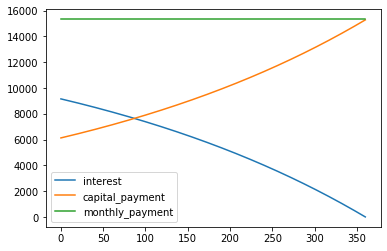

In [10]:
plt.plot(result.interest_amount, label='interest')
plt.plot(result.capital_downpayment_amount, label='capital_payment')
plt.plot(result.monthly_payment, label='monthly_payment')
plt.legend()
plt.show()

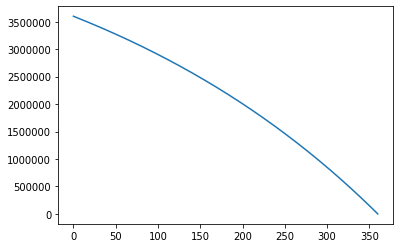

In [11]:
plt.plot(result.mortgage_amount)
plt.show()

In [12]:
point_in_time = 36
paid_interests = result.interest_amount.iloc[:point_in_time].sum() + result.fee.iloc[:point_in_time].sum()
profit = result.current_price.iloc[point_in_time] - result.current_price.iloc[0]
equity = result.capital_downpayment_amount.iloc[:point_in_time].sum()
deposit = result.current_price.iloc[0] - result.mortgage_amount[0]
print('Paid interests to date: {:.0f}'.format(paid_interests))
print('Profit in case of sale: {:.0f}'.format(profit))
print('Equity to date: {:.0f}'.format(equity))

Paid interests to date: 321104
Profit in case of sale: 1462364
Equity to date: 230596


In [13]:
total_revenue = equity + profit + deposit
print('Total revenue: {:.0f}'.format(total_revenue))

Total revenue: 2292960
